In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from matplotlib import pyplot

In [2]:
dataset=pd.read_csv("KCLT.csv")
dataset

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,85,70,100,67,88,55,102,1979,1952,1.21,0.11,1.98
361,2015-6-27,82,71,92,67,88,56,103,2012,1954,0.55,0.11,1.86
362,2015-6-28,76,66,85,67,88,53,101,1968,1959,0.00,0.11,1.83
363,2015-6-29,73,59,87,67,88,54,104,1974,2012,0.00,0.11,2.39


In [3]:
def mov_mean(df,col,N):
    mov_avg = df[col].ewm(span=N).mean()
       
    return mov_avg

dataset['moving_avg'] = mov_mean(df=dataset,col ='actual_max_temp',N = 20)
dataset[['date','actual_max_temp','moving_avg']].head(40)

,date,actual_max_temp,moving_avg
0,2014-7-1,91,91.000000
1,2014-7-2,95,93.100000
2,2014-7-3,93,93.063281
3,2014-7-4,86,91.024221
4,2014-7-5,84,89.325121
5,2014-7-6,87,88.834627
6,2014-7-7,91,89.244045
7,2014-7-8,94,90.066136
8,2014-7-9,89,89.895123
9,2014-7-10,85,89.157960


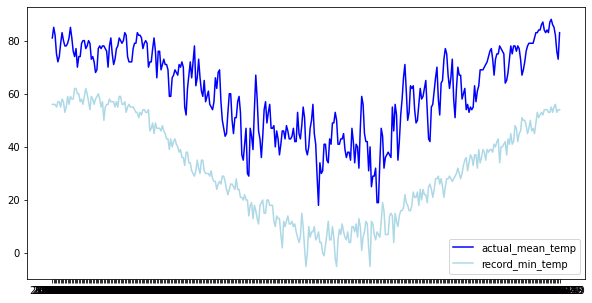

In [4]:
plt.figure(figsize=(10,5))
pyplot.plot("date","actual_mean_temp",data=dataset,color="blue")
pyplot.plot("date","record_min_temp",data=dataset,color="#add8e6")
plt.legend(loc ='lower right')

###  - In the above chart you can see that real mean temp is parallel to the record min temperature for the dates from  2014 to 2015 so we can say that a similar example will be noticed for the following year 2016

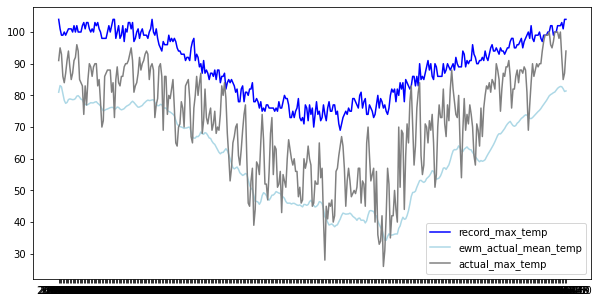

In [5]:
x=dataset["actual_mean_temp"].ewm(span=20).mean()
dataset["ewm_actual_mean_temp"]=x
plt.figure(figsize=(10,5))
pyplot.plot("date","record_max_temp",data=dataset,color="blue")
pyplot.plot("date","ewm_actual_mean_temp",data=dataset,color="#add8e6")
pyplot.plot("date","actual_max_temp",data=dataset,color="grey")
plt.legend(loc = 'lower right')

### -  In the second chart we can see that the temperature that was anticipated as max temperature was really higher than the actual max temperature so we can't rely on the recorded max temperature worth to foresee the real max temp for future years